Dimensionality reduction is the task of reducing the number of features in a dataset. In machine learning tasks like regression or classification, there are often too many variables to work with. These variables are also called features.

The higher the number of features, the more difficult it is to model them, this is known as the curse of dimensionality.

## Curse of dimensionality

It is well known that ML/DL algorithms need a large amount of data to learn invariance, patterns, and representations. If this data comprises a large number of features, this can lead to the curse of dimensionality. The curse of dimensionality, first introduced by Bellman, describes that in order to estimate an arbitrary function with a certain accuracy the number of features or dimensionality required for estimation grows exponentially. This is especially true with big data which yields more sparsity. 

Issues that arise with high dimensional data are:

1. Running a risk of overfitting the machine learning model. 
2. Difficulty in clustering similar features.
3. Increased space and computational time complexity.

## Decomposition algorithms 

Decomposition algorithm in scikit-learn involves dimensionality reduction algorithms. We can call various techniques using the following command:

### Principal Component Analysis (PCA)

Principal Component Analysis, or PCA, is a dimensionality-reduction method to find lower-dimensional space by preserving the variance as measured in the high dimensional input space. It is an unsupervised method for dimensionality reduction. 

PCA transformations are linear transformations. It involves the process of finding the principal components, which is the decomposition of the feature matrix into eigenvectors. This means that PCA will not be effective when the distribution of the dataset is non-linear. 

### Step 1: Standardize the Data
PCA works best when the data is standardized because it’s sensitive to the scales of features. This means each feature (variable) should have a mean of 0 and a standard deviation of 1.

**Example:**
Let's say we have two features, `X1` (height in cm) and `X2` (weight in kg). These two features have different scales, so we standardize them.

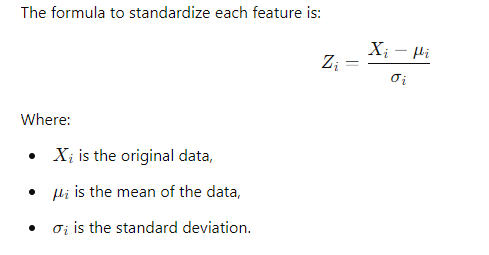

### Step 2: Compute the Covariance Matrix
The covariance matrix tells us how the features vary together. It helps PCA to understand relationships between features.

**Example:**
For two features \( X_1 \) and \( X_2 \), the covariance matrix looks like this:
\[
\text{Cov}(X_1, X_2) = \begin{pmatrix} 
\text{Var}(X_1) & \text{Cov}(X_1, X_2) \\
\text{Cov}(X_2, X_1) & \text{Var}(X_2)
\end{pmatrix}
\]
Where:
- \( \text{Var}(X_1) \) and \( \text{Var}(X_2) \) are the variances of features,
- \( \text{Cov}(X_1, X_2) \) is the covariance between the two features.

### Step 3: Compute the Eigenvalues and Eigenvectors
Eigenvalues and eigenvectors give the "directions" and "strength" of the new principal components (PCs).

- **Eigenvectors** determine the directions of the new feature space.
- **Eigenvalues** tell how much variance (information) each new direction (component) captures.

### Step 4: Select Principal Components
Sort the eigenvalues in descending order. The eigenvectors corresponding to the largest eigenvalues are the principal components (PCs).

**Example:**
If the first two eigenvalues are large and others are small, you select the first two eigenvectors as your principal components.

### Step 5: Transform the Data
Finally, project the original data onto the new feature space formed by the selected principal components. This gives you a lower-dimensional representation of your data.

**Mathematically**, this is done by multiplying the original standardized data matrix \( Z \) with the matrix of eigenvectors \( V \):
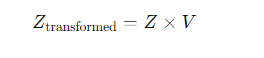

### Example in Action:
Imagine a dataset with two features: height and weight. After performing PCA, you might find that most of the variance (information) in the data is along a direction that is a combination of height and weight, allowing you to reduce the dataset to a single dimension while still capturing most of the information.

By following these steps, PCA reduces the dimensionality of data, making it easier to visualize, analyze, and model while retaining the most important information.

Reducing the number of variables of data not only reduces complexity but also decreases the accuracy of the machine learning model. However, with a smaller number of features it is easy to explore, visualize and analyze, it also makes machine learning algorithms computationally less expensive. In simple words, the idea of PCA is to reduce the number of variables of a data set, while preserving as much information as possible.



In [1]:
import numpy as np
def pca(X=np.array([]), no_dims=50):
    print("Preprocessing the data using PCA...")
    (n, d) = X.shape
    Mean = np.tile(np.mean(X, 0), (n, 1))
    X = X - Mean
    (l, M) = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, M[:, 0:no_dims])
    return Y

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [4]:
digits['data'].shape

(1797, 64)

In [2]:
from sklearn.decomposition import PCA

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [6]:
projected[0]

array([-1.25946653, 21.2748852 ])

## Kernel PCA (KPCA)

The PCA transformations we described previously are linear transformations that are ineffective with the non-linear distribution. To deal with non-linear distribution, the basic idea is to use the kernel trick. 

A kernel trick is simply a method to project non-linear data onto a higher dimensional space and separate different distributions of data. Once the distributions are separated we can use PCA to separate them linearly.



In [7]:
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA
np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

Text(0, 0.5, '$x_2$')

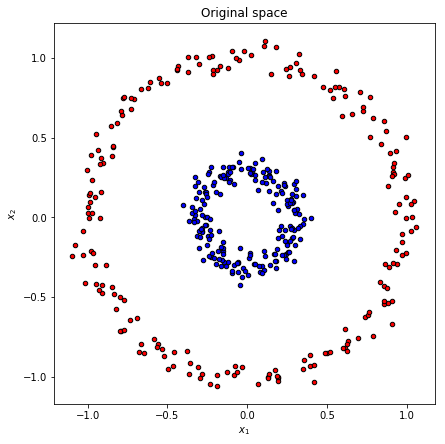

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
           s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
           s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Text(0, 0.5, '2nd component')

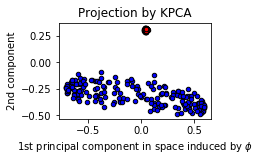

In [9]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10, )
X_kpca = kpca.fit_transform(X)


plt.subplot(1, 2, 2, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
           s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
           s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

## Discriminant Analysis

Discriminant Analysis is another module that scikit-learn provides. It can be called using the following command:

### Linear Discriminant Analysis (LDA)

LDA is an algorithm that is used to find a linear combination of features in a dataset. Like PCA, LDA is also a linear transformation-based technique. But unlike PCA it is a supervised learning algorithm. 

LDA computes the directions, i.e. linear discriminants that can create decision boundaries and maximize the separation between multiple classes. It is also very effective for multi-class classification tasks.

To have a more intuitive understanding of LDA, consider plotting a relationship of two classes as shown in the image below. 



In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

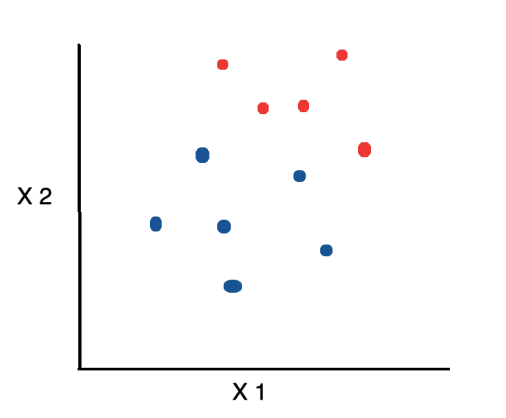

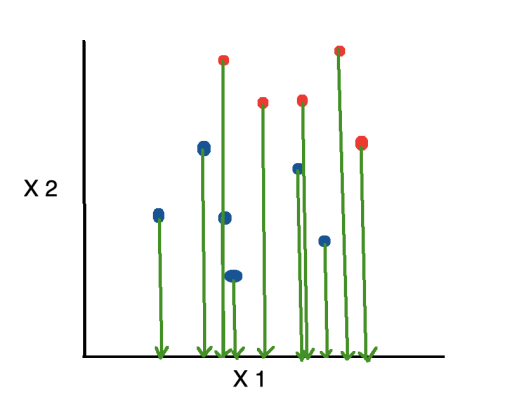

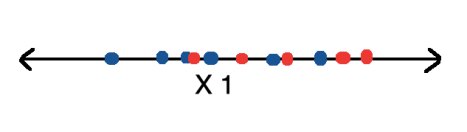

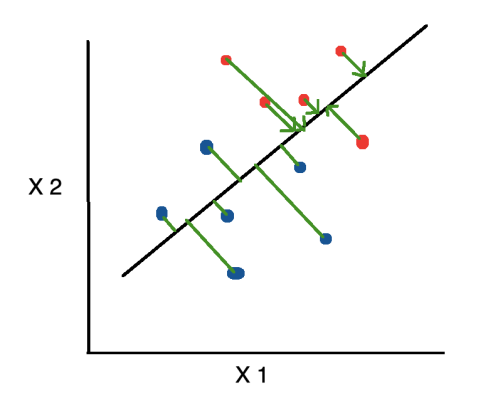

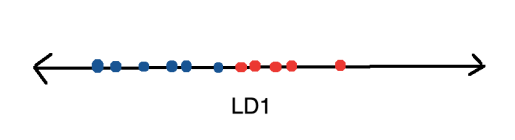

LDA can be used for multivariate data as well. It makes data inference quite simple. LDA can be computed using the following 5 steps:

1. Compute the d-dimensional mean vectors for the different classes from the dataset.

2. Compute the scatter matrices (in-between-class and within-class scatter matrices). the Scatter matrix is used to make estimates of the covariance matrix. This is done when the covariance matrix is difficult to calculate or joint variability of two random variables is difficult to calculate. 

3. Compute the eigenvectors (e1, e2, e3…ed) and corresponding eigenvalues (λ1,λ2,…,λd) for the scatter matrices.

4. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix W (where every column represents an eigenvector).

5. Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: Y=X×W (where X is an n×d dimensional matrix representing the n samples, and y are the transformed n×k-dimensional samples in the new subspace).

### Applications of dimentionality reduction

Dimensionality reduction finds its way in many real-life applications some of which are:

1. Customer relationship management

2. Text categorization

3. Image retrieval

4. Intrusion detection

5. Medical image segmentation 

Advantages and disadvantages of dimentionality reduction

__Advantages of dimensionality reduction:__

1. It helps in data compression by reducing features.

2. It reduces storage.

3. It makes machine learning algorithms computationally efficient.

4. It also helps remove redundant features and noise.

5. It tackles the curse of dimensionality

__Disadvantages of dimensionality reduction:__

1. It may lead to some amount of data loss.

2. Accuracy is compromised. 